<a href="https://colab.research.google.com/github/kinglider/Machine-Learning-Adventures/blob/master/Home_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Notebook Imports**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#**Gather Data**
[Source: Scikit-learn Toy Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [ ]:
boston_data = load_boston()

In [ ]:
type(boston_data)

sklearn.utils.Bunch

In [ ]:
boston_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##**Data Points And Features**


In [ ]:
len(boston_data)

5

In [ ]:
type(boston_data)

sklearn.utils.Bunch

In [ ]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston_data.data.shape

(506, 13)

In [ ]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

##**Data Eploration With Pandas Dataframe**

In [ ]:
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
data['PRICE'] = boston_data.target

In [ ]:
data.head() #data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

##**Cleaning The Data**

In [ ]:
pd.isnull(data) #to check for empty values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##**Visualizing The Data Through Various Charts**

(array([ 2.,  1.,  1.,  0.,  5.,  2.,  1.,  6.,  3.,  0.,  3.,  3.,  5.,
         3.,  4.,  6.,  3.,  5., 14.,  9.,  9.,  6., 11.,  8.,  6.,  8.,
         6., 10.,  9.,  9., 15., 13., 20., 16., 19., 10., 14., 19., 13.,
        15., 21., 16.,  9., 12., 14.,  1.,  0.,  4.,  5.,  2.,  6.,  5.,
         5.,  4.,  3.,  6.,  2.,  3.,  4.,  3.,  4.,  3.,  6.,  2.,  1.,
         1.,  5.,  3.,  1.,  4.,  1.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  2.,  1.,  0., 16.]),
 array([ 5.  ,  5.45,  5.9 ,  6.35,  6.8 ,  7.25,  7.7 ,  8.15,  8.6 ,
         9.05,  9.5 ,  9.95, 10.4 , 10.85, 11.3 , 11.75, 12.2 , 12.65,
        13.1 , 13.55, 14.  , 14.45, 14.9 , 15.35, 15.8 , 16.25, 16.7 ,
        17.15, 17.6 , 18.05, 18.5 , 18.95, 19.4 , 19.85, 20.3 , 20.75,
        21.2 , 21.65, 22.1 , 22.55, 23.  , 23.45, 23.9 , 24.35, 24.8 ,
        25.25, 25.7 , 26.15, 26.6 , 27.05, 27.5 , 27.95, 28.4 , 28.85,
        

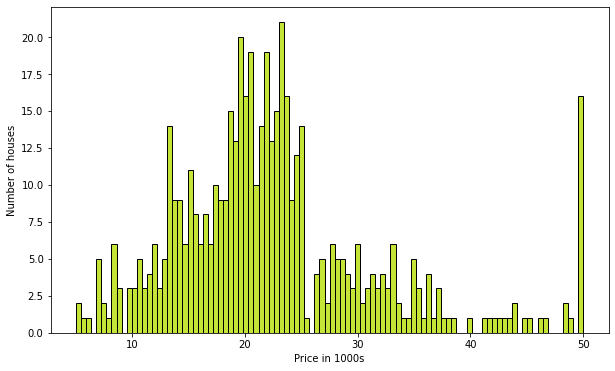

In [ ]:
plt.figure(figsize = [10,6])
plt.xlabel('Price in 1000s')
plt.ylabel('Number of houses')
plt.hist(data['PRICE'], ec = 'black',bins = 100, color ='#C4E538')

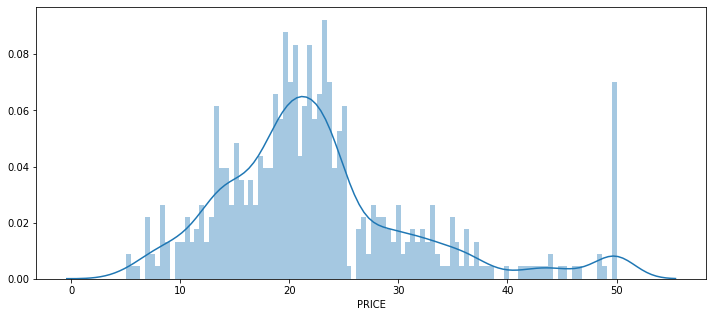

In [ ]:

plt.figure(figsize = [12,5])
sns.distplot(data['PRICE'], bins = 100) #seaborn kde, hist
#The curved line is a pdf

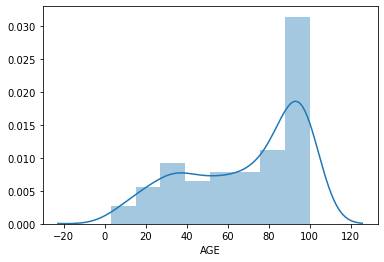

In [ ]:
sns.distplot(data['AGE'])

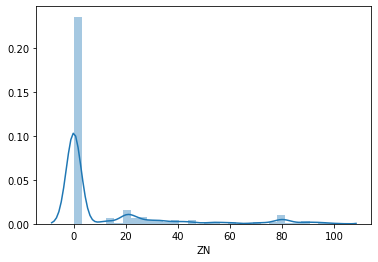

In [ ]:
sns.distplot(data['ZN'])

In [ ]:
data['AGE'].mean()

68.57490118577078

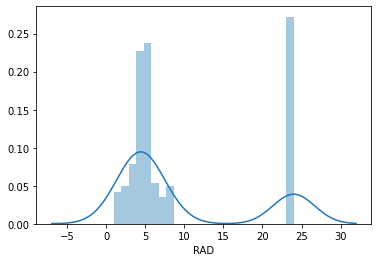

In [ ]:
sns.distplot(data['RAD'],bins = 24)

In [ ]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [ ]:
data['CHAS'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CHAS, Length: 506, dtype: bool

In [ ]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

##**Correlation**
## $$ \rho _{XY} = Corr(X,Y) $$
## $$ -1.0 \leq \rho _ {XY} \leq 1.0$$

In [ ]:
data['PRICE'].corr(data['RM']) #correlation between PRICE and NUMBER OF ROOMS

0.6953599470715393

In [ ]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [ ]:
data.corr().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [ ]:
mask = np.zeros_like(data.corr())

In [ ]:
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
triangle_indices = np.triu_indices_from(mask)

In [ ]:
triangle_indices

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13]))

In [ ]:
mask[triangle_indices] = True

In [ ]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

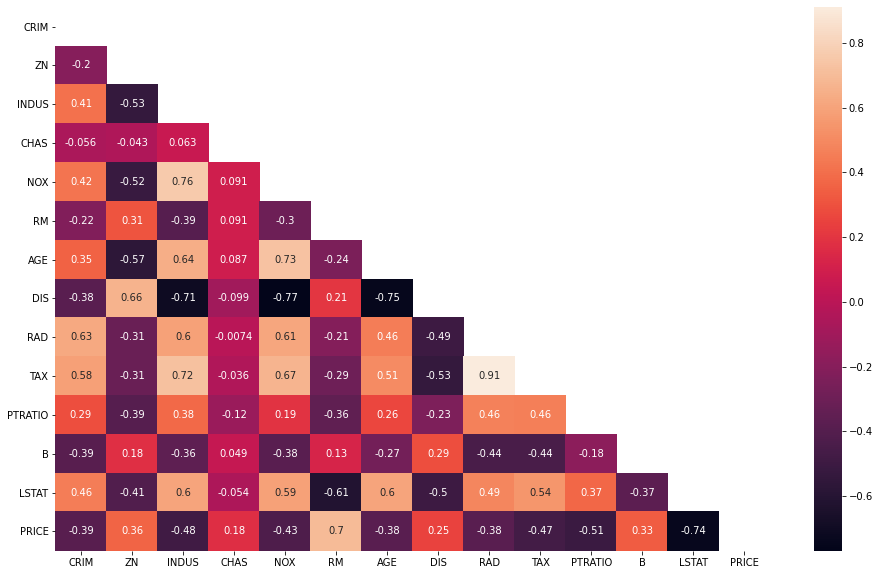

In [ ]:
plt.figure(figsize = [16,10])
sns.heatmap(data.corr(),mask = mask, annot=True)

Text(0.5, 1.0, 'DIS vs NOX Correlation -0.769')

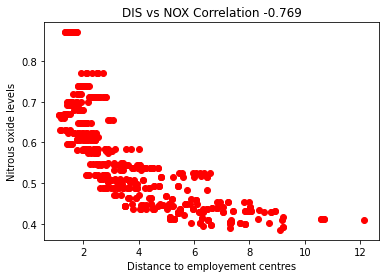

In [ ]:
plt.scatter(data['DIS'], data['NOX'], color = 'red')
plt.xlabel('Distance to employement centres')
plt.ylabel('Nitrous oxide levels')
nox_dis_corr = round(data['NOX'].corr(data['DIS']) , 3)
plt.title(f'DIS vs NOX Correlation {nox_dis_corr}')



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


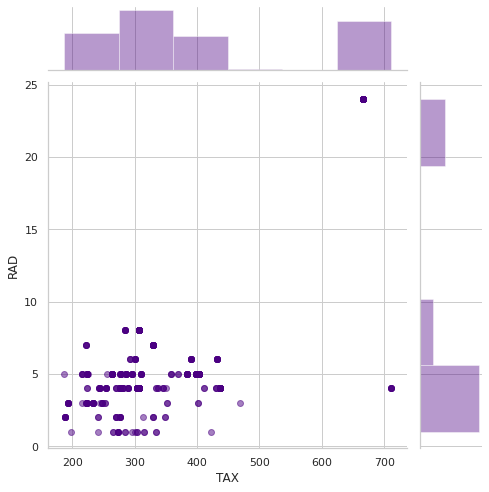

In [ ]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x = data['TAX'],y = data['RAD'], size = 7, color = 'indigo',alpha = 0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


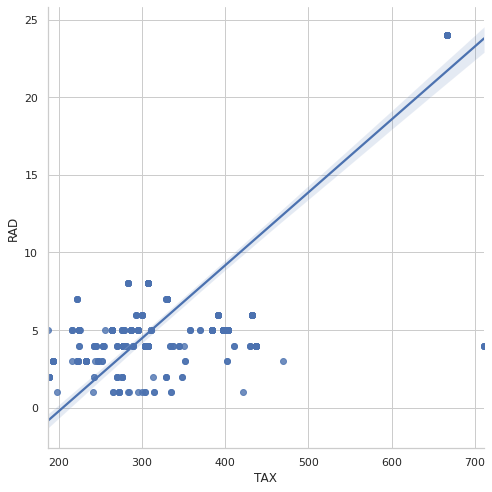

In [ ]:
sns.lmplot(x='TAX', y='RAD',data=data,size = 7) 

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'House price variation w.r.t. number of rooms\nCorrelation: 0.695')

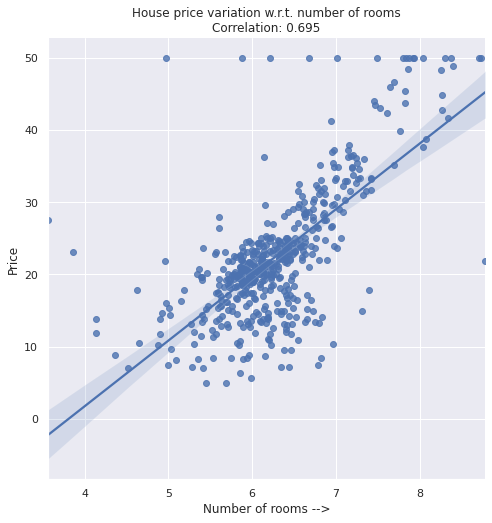

In [ ]:
#number of rooms vs house prices
sns.set_style('darkgrid')
sns.set_context('notebook')
rm_pr_corr = data['PRICE'].corr(data['RM'])
#sns.jointplot(x= data['RM'], y = data['PRICE'], color = 'blue', joint_kws = {'alpha':0.5})
sns.lmplot(x='RM',y='PRICE',data=data,size = 7)
plt.xlabel('Number of rooms -->')
plt.ylabel('Price')
plt.title(f'House price variation w.r.t. number of rooms\nCorrelation: {round(rm_pr_corr,3)}')

CPU times: user 16.2 s, sys: 244 ms, total: 16.5 s
Wall time: 16.3 s


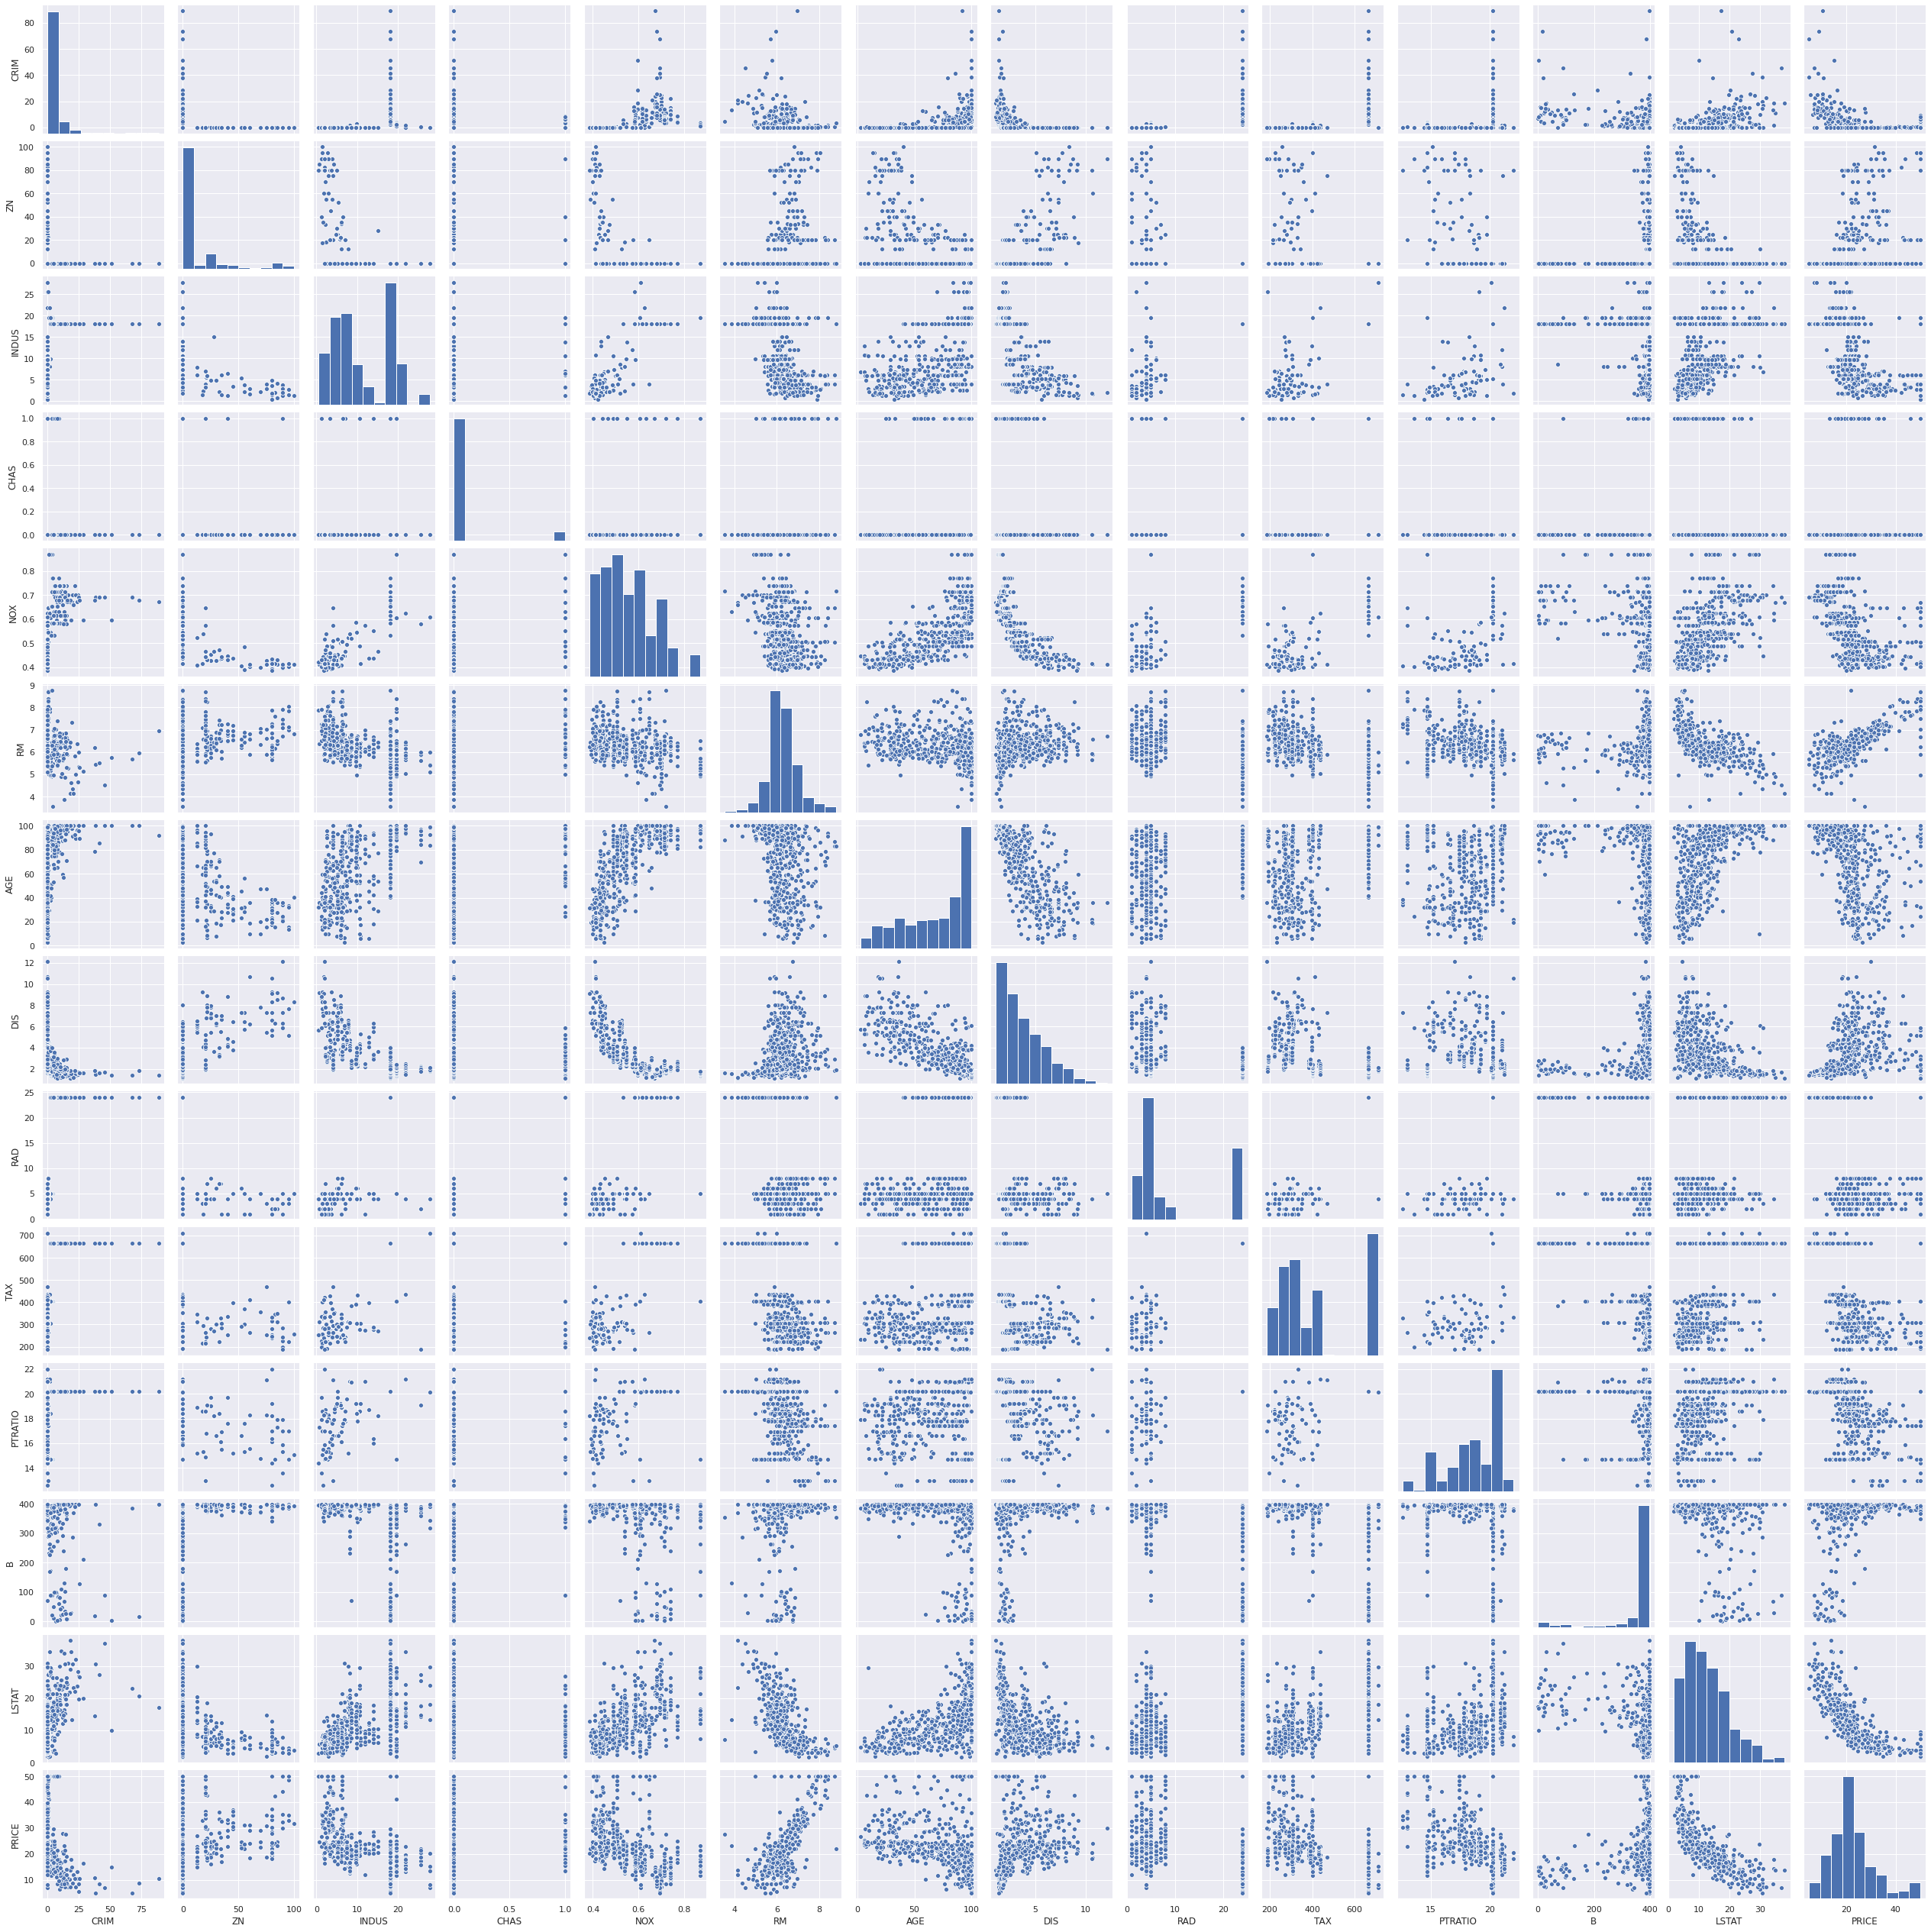

In [ ]:
%%time
sns.pairplot(data=data)

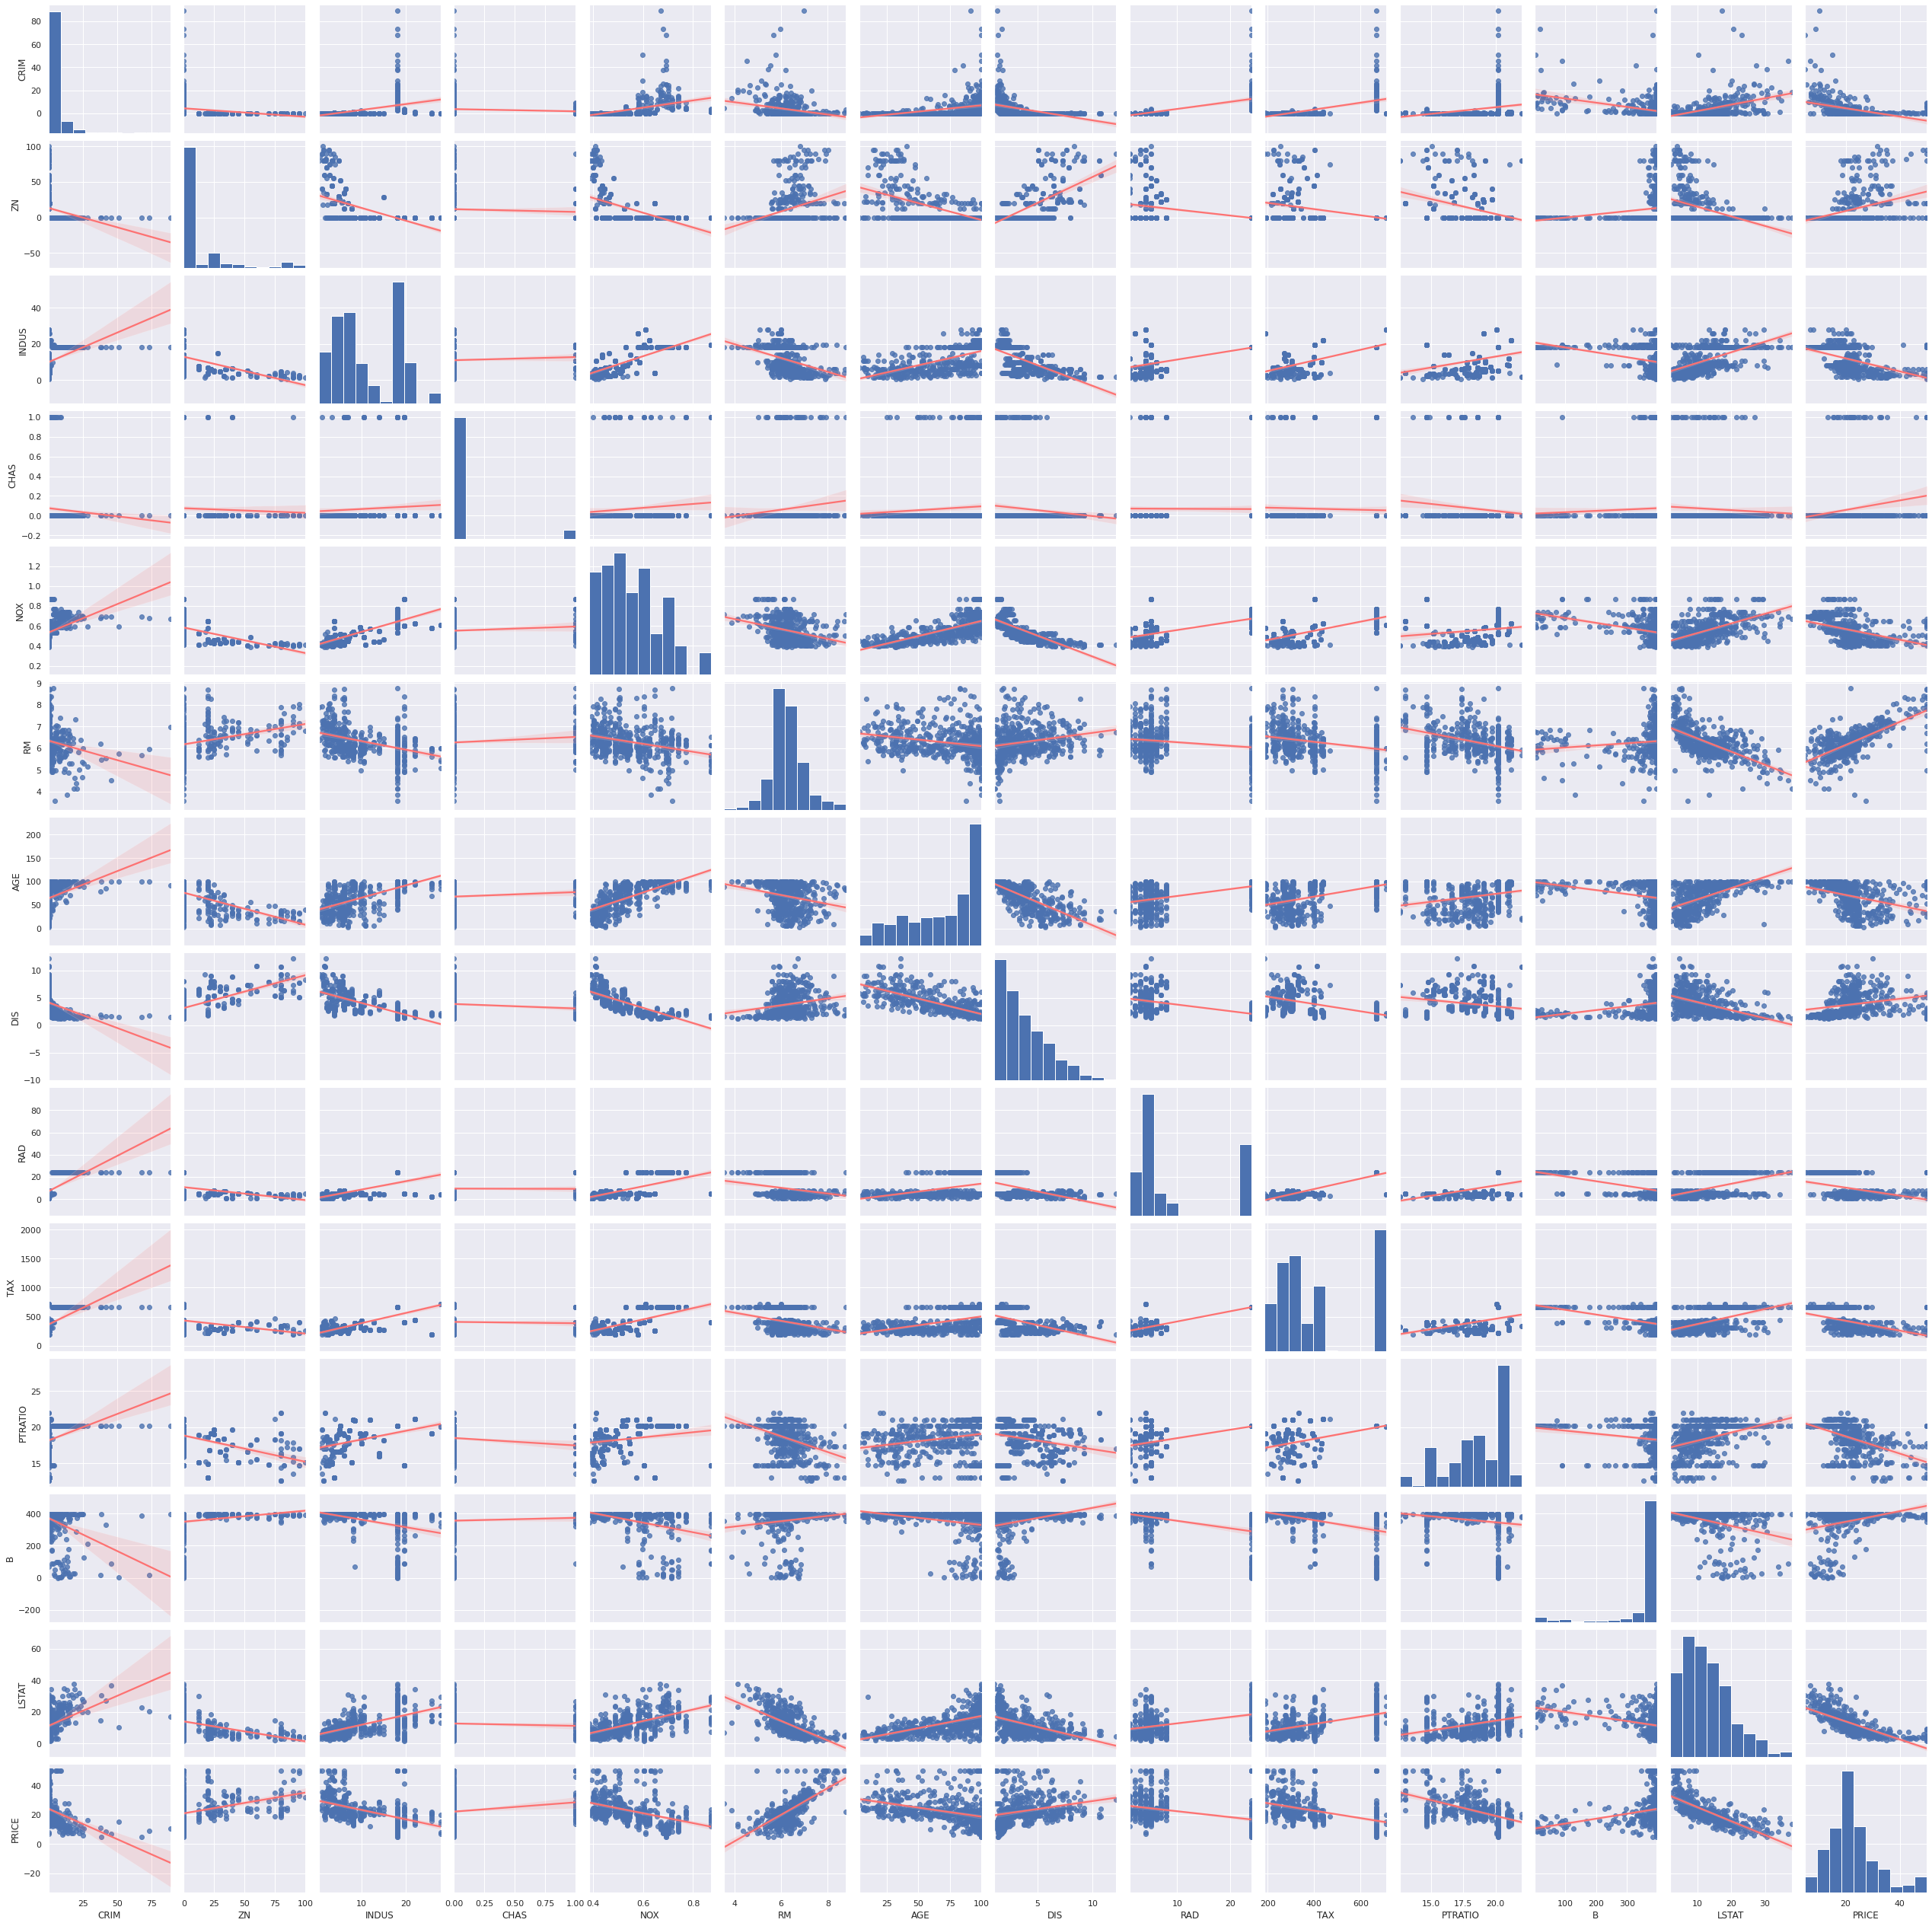

In [ ]:
sns.pairplot(data,kind = 'reg', plot_kws={'line_kws':{'color': '#FD7272'}})

##**Splitting Training And Testing Datasets**

In [ ]:
prices = data['PRICE']
features = data.drop('PRICE',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2, random_state = 10)


##**Multivariable Regression**

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_, index = X_train.columns, columns=['coef'])

Intercept:  36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [ ]:
rs1 = regr.score(X_train,y_train)
rs2 = regr.score(X_test,y_test)

In [ ]:
print('R-squared value for training data: ', rs1)
print('R-squared value for testing data: ', rs2)

R-squared value for training data:  0.750121534530608
R-squared value for testing data:  0.6709339839115651


##**Data Transformation**

In [ ]:
data['PRICE'].skew()

1.1080984082549072

In [ ]:
y_log = np.log(data['PRICE'])

In [ ]:
y_log.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Log prices with skew-0.33032129530987864')

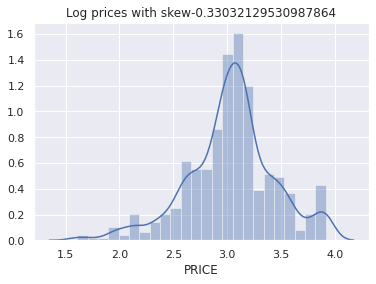

In [ ]:
sns.distplot(y_log)
plt.title(f'Log prices with skew{y_log.skew()}')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


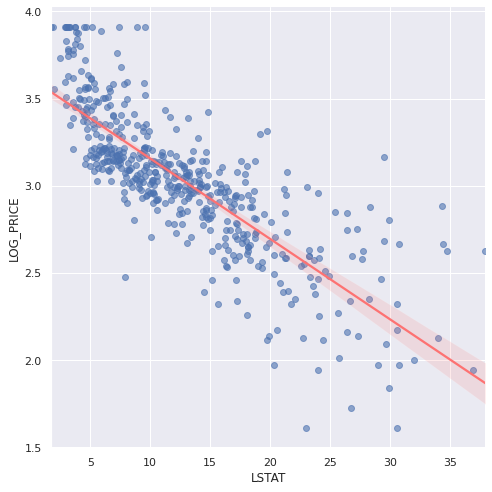

In [ ]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE',data=transformed_data,size = 7, scatter_kws={'alpha':0.6},line_kws={'color' : '#FD7272'})

##**Regression Using log Prices**

In [ ]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2, random_state = 10)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercept: ', regr.intercept_)
coefs = pd.DataFrame(regr.coef_, index = X_train.columns, columns=['coef'])
print(coefs)
rs1 = regr.score(X_train,y_train)
rs2 = regr.score(X_test,y_test)
print('R-squared value for training data: ', rs1)
print('R-squared value for testing data: ', rs2)

Intercept:  4.059943871775192
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
R-squared value for training data:  0.7930234826697583
R-squared value for testing data:  0.7446922306260735


In [ ]:
np.e**0.080331

1.0836456950439142

#**p-Values and Evaluating Coefficients**

In [ ]:
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
#results.params for coeffs
#p val
#results.pvalues
pd.DataFrame({'coef':results.params, 'p-val':round(results.pvalues,3)})

,coef,p-val
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


##**Testing For Multicollinearity**
$$ TAX = \alpha _0 + \alpha _1 RM + 
\alpha _2 NOX + .... + \alpha _{12} LSTAT$$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)}$$

In [ ]:
variance_inflation_factor(exog = np.array(X_include_constant), exog_idx=1)

1.7145250443932485

In [ ]:
#or
variance_inflation_factor(exog = X_include_constant.values, exog_idx=1)

1.7145250443932485

In [ ]:
#loop for all VIFs
vif = []
for i in range(X_include_constant.shape[1]):
  vif.append(variance_inflation_factor(exog=X_include_constant.values,exog_idx=i))

In [ ]:
pd.DataFrame({'Names':X_include_constant.columns, 'VIF': np.around(vif,2)})

,Names,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


##**Model Simplification And Baysian Information Criterion**

In [ ]:
#original model with all features
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
orig_coef = pd.DataFrame({'coef':results.params, 'p-val':round(results.pvalues,3)})
print('BIC: ',results.bic)
print('R-squared: ',results.rsquared)

BIC:  -139.74997769478875
R-squared:  0.7930234826697583


In [ ]:
#reduced model excluding indus
X_include_constant = sm.add_constant(X_train)
X_include_constant = X_include_constant.drop(['INDUS'],axis=1)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
coef_except_indus = pd.DataFrame({'coef':results.params, 'p-val':round(results.pvalues,3)})
print('BIC: ',results.bic)
print('R-squared: ',results.rsquared)

BIC:  -145.1450885559114
R-squared:  0.7927126289415162


In [ ]:
#original model excluding age and indus
X_include_constant = sm.add_constant(X_train)
X_include_constant = X_include_constant.drop(['INDUS','AGE'],axis = 1)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
coef_except_age_indus = pd.DataFrame({'coef':results.params, 'p-val':round(results.pvalues,3)})
print('BIC: ',results.bic)
print('R-squared: ',results.rsquared)

BIC:  -149.49934294224678
R-squared:  0.7918657661852815


In [ ]:
frames = [orig_coef,coef_except_indus,coef_except_age_indus]
pd.concat(frames,axis = 1)

,coef,p-val,coef,p-val,coef,p-val
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


#**Residuals And Residual Plots**

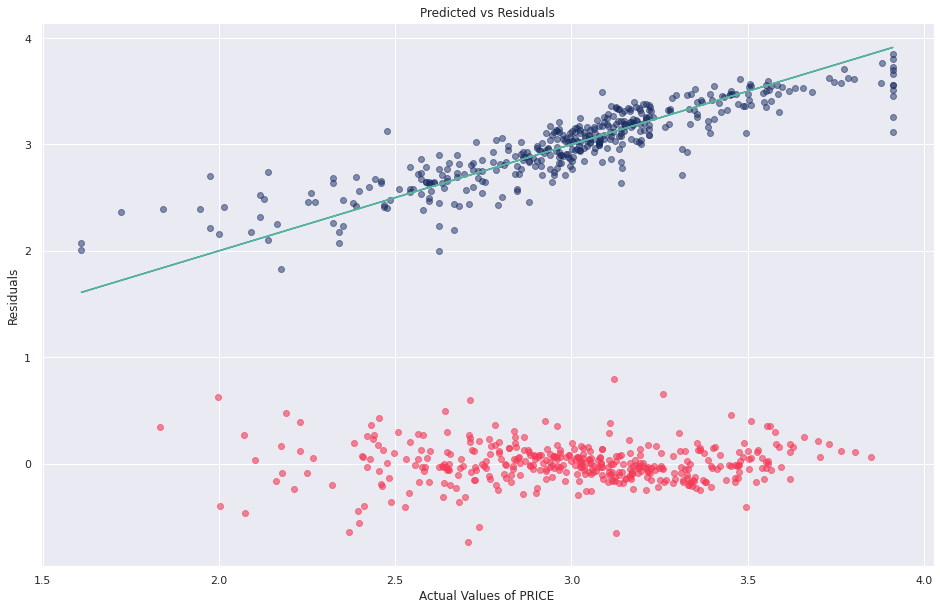

In [ ]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS','AGE'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2, random_state = 10)
#using statsmodel
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
#residuals = y_train - results.fittedvalues
corr = round(y_train.corr(results.fittedvalues),3)
plt.figure(figsize= [16,10])
plt.title(f'Predicted vs Actual Values $y _i$ and $\hat y _i$ Corr {corr}')
plt.xlabel('Actual Values of PRICE')
plt.ylabel('Predicted')
plt.plot(y_train,y_train,color = '#58B19F')
plt.scatter(y_train, results.fittedvalues, color = '#182C61',alpha = 0.5)

#residual vs predicted
plt.title('Predicted vs Residuals')
plt.xlabel('Actual Values of PRICE')
plt.ylabel('Residuals')
plt.scatter(x=results.fittedvalues, y=results.resid, color='#f53b57',alpha = 0.6)


Text(0.5, 1.0, 'Residuals')

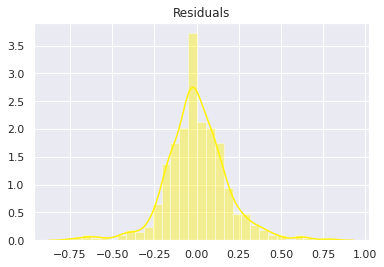

In [ ]:
resid_mean = round(results.resid.mean(),3)
results.resid.skew()
sns.set()
sns.distplot(results.resid,color='#fff200')
sns.set_style('darkgrid')
plt.title('Residuals')

0.092999425941225


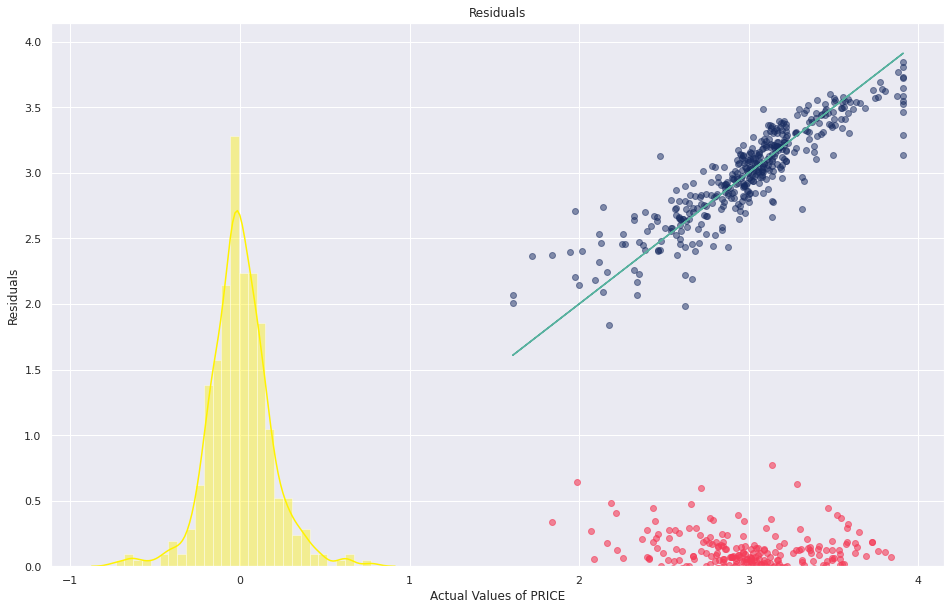

In [ ]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2, random_state = 10)
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_include_constant)
results = model.fit()
corr = round(y_train.corr(results.fittedvalues),3)
plt.figure(figsize= [16,10])
plt.title(f'Predicted vs Actual Values $y _i$ and $\hat y _i$ Corr {corr}')
plt.xlabel('Actual Values of PRICE')
plt.ylabel('Predicted')
plt.plot(y_train,y_train,color = '#58B19F')
plt.scatter(y_train, results.fittedvalues, color = '#182C61',alpha = 0.5)
plt.title('Predicted vs Residuals')
plt.xlabel('Actual Values of PRICE')
plt.ylabel('Residuals')
plt.scatter(x=results.fittedvalues, y=results.resid, color='#f53b57',alpha = 0.6)
resid_mean = round(results.resid.mean(),3)
results.resid.skew()
sns.set()
sns.distplot(results.resid,color='#fff200')
sns.set_style('darkgrid')
plt.title('Residuals')
print(results.resid.skew(
))

##**Mean Squared Error**

In [ ]:
reduced_log_mse = results.mse_resid #mse using statsmodel.api

In [ ]:
reduced_log_mse = round(reduced_log_mse,3)

#**The Model**

In [ ]:
#gather data
boston_data = 